# Model

In [1]:
# fix relative import
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [2]:
import torch

In [3]:
# ConvBlock
from crepe.model import ConvBlock
convBlock = ConvBlock(
    in_channels=3,   # Number of input channels
    out_channels=6,  # Number of output channels
    kernel_width=4,  # Width of the convolution kernel
    stride=2         # Stride of the convolution
)
expected = """ConvBlock(
  (layer): Sequential(
    (0): ZeroPad2d((0, 0, 1, 2))
    (1): Conv2d(3, 6, kernel_size=(4, 1), stride=(2, 2))
    (2): ReLU()
    (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
  )
)"""
print("** convBlock **")
print("layers: ")
print(str(convBlock))
print(f"verification: {(str(convBlock)==expected)}")

** convBlock **
layers: 
ConvBlock(
  (layer): Sequential(
    (0): ZeroPad2d((0, 0, 1, 2))
    (1): Conv2d(3, 6, kernel_size=(4, 1), stride=(2, 2))
    (2): ReLU()
    (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=(2, 1), stride=(2, 1), padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
  )
)
verification: True


In [23]:
# Import crepe
from crepe.model import Crepe

device = torch.device('cuda' if torch.cuda.is_available(
) else 'mps' if torch.backends.mps.is_available() else 'cpu')

crepe = Crepe(model_capacity='tiny', device=device)

print(f"crepe device: ", crepe.device)
print(f"crepe model_capacity: ", crepe.model_capacity)


crepe device:  cuda
crepe model_capacity:  tiny


In [35]:
# load fake audio to crepe (randn)
fake_sr = 16000
fake_audio = torch.randn([1, 3*fake_sr])
max_abs_value = torch.max(torch.abs(fake_audio))
fake_audio = fake_audio / max_abs_value

fake_audio = (fake_audio - torch.mean(fake_audio) ) / (torch.max(fake_audio))
print("Fake audio test")
print("load fake audio torch.randn([1, 3*fake_sr])")
print(f"fake_sr: {fake_sr} Hz")
print(f"fake_audio shape: {fake_audio.shape}")

time, frequency, confidence, activation = crepe.predict(
    audio=fake_audio,
    sr = fake_sr
)
print("\nProcess..")
print(f"activation Shape: {activation.shape}")
print(f"confidence Shape: {frequency.shape}")
print(f"frequency Shape:  {frequency.shape}")
print(f"time Shape:       {frequency.shape}")


Fake audio test
load fake audio torch.randn([1, 3*fake_sr])
fake_sr: 16000 Hz
fake_audio shape: torch.Size([1, 48000])

Process..
activation Shape: torch.Size([301, 360])
confidence Shape: torch.Size([301])
frequency Shape:  torch.Size([301])
time Shape:       torch.Size([301])


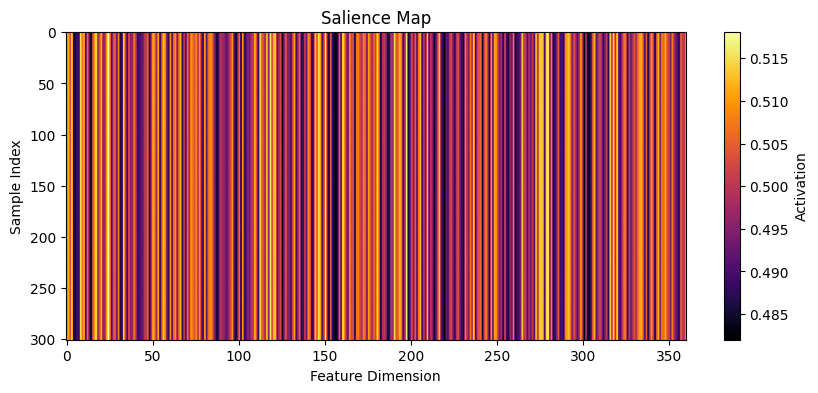

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

salience = activation.flip(1)
plt.figure(figsize=(10, 4))  # Adjust the figure size
plt.imshow(salience.detach().numpy(), cmap='inferno', aspect='auto')
plt.colorbar(label='Activation')  # Add a color bar for reference
plt.title('Salience Map')
plt.xlabel('Feature Dimension')
plt.ylabel('Sample Index')
plt.show()